Part A - 2
Build a CNN ensemble containing a maximum of 10 base learners. bold text

In [1]:
'''
Name: Peter Sunny Shanthveer Markappa
Student Number: R00208303
Assignment: Deep Learning Assignment 02
Draft : final
Date of submission : 01-May-2022
'''

'\nName: Peter Sunny Shanthveer Markappa\nStudent Number: R00208303\nAssignment: Deep Learning Assignment 02\nDraft : final\nDate of submission : 01-May-2022\n'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/Deep_learning_02/earth_data.zip" -d "./"

Archive:  /content/gdrive/My Drive/Deep_learning_02/earth_data.zip
  inflating: ./earth_data.h5         


In [ ]:
# Instruction: create directory called weights in the same place from where this file will be run

In [ ]:
!ls

earth_data.h5  gdrive  sample_data


In [ ]:
import numpy as np
import h5py

import tensorflow as tf

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score


In [ ]:
# function to Loading the Data from Drive
def loadDataH5(): 
  with h5py.File('earth_data.h5','r') as hf:
    trainX = np.array(hf.get('trainX'))
    trainY = np.array(hf.get('trainY'))
    valX = np.array(hf.get('valX'))
    valY = np.array(hf.get('valY'))
    print (trainX.shape,trainY.shape)
    print (valX.shape,valY.shape)

    return trainX, trainY, valX, valY

trainX, trainY, valX, valY = loadDataH5()

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)


In [ ]:
trainX = trainX.astype('float32')/255.0
# trainY = trainY.astype('float32')/255.0

valX = valX.astype('float32')/255.0
# valY = valY.astype('float32')/255.0

In [ ]:
print(trainX.shape[1:])

(64, 64, 3)


Base Learner - 1

In [ ]:
# Architecture 1

def  base_learner_model_1(class_label, input_model):

  base_learner_1 = Sequential()

  # 1st Layer
  base_learner_1.add(Conv2D(16, (3,3), input_shape=input_model, activation = 'relu', padding= 'same'))
  base_learner_1.add(MaxPooling2D(2, 2))

  # 2nd Layer
  base_learner_1.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_1.add(Conv2D(48, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_1.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_1.add(MaxPooling2D(2, 2))

  # 3nd Layer
  base_learner_1.add(Conv2D(96, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))

  base_learner_1.add(Flatten())
  base_learner_1.add(Dense(32, activation = 'relu') )
  base_learner_1.add(Dense(9, activation = 'softmax') )

  return base_learner_1




**Base Learner - 2**

In [ ]:
# Architecture 2

def  base_learner_model_2(class_label, input_model):

  base_learner_2 = Sequential()

  # 1st Layer
  base_learner_2.add(Conv2D(16, (3,3), input_shape=input_model, activation = 'relu', padding= 'same'))
  base_learner_2.add(MaxPooling2D(2, 2))

  # 2nd Layer
  base_learner_2.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_2.add(Conv2D(48, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_2.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_2.add(MaxPooling2D(2, 2))

  # 3nd Layer
  base_learner_2.add(Conv2D(96, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))

  # 4th Layer
  base_learner_2.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_2.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))

  base_learner_2.add(Flatten())
  base_learner_2.add(Dense(256, activation = 'relu') )
  base_learner_2.add(Dense(9, activation = 'softmax') )

  return base_learner_2




**Base Learner - 3**

In [ ]:
# Architecture 3

def  base_learner_model_3(class_label, input_model):

  base_learner_3 = Sequential()

  # 1st Layer
  base_learner_3.add(Conv2D(16, (3,3), input_shape=input_model, activation = 'relu', padding= 'same'))
  base_learner_3.add(MaxPooling2D(2, 2))

  # 2nd Layer
  base_learner_3.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_3.add(Conv2D(48, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_3.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_3.add(MaxPooling2D(2, 2))

  # 3nd Layer
  base_learner_3.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_3.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_3.add(Conv2D(96, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))

  # 4th Layer
  base_learner_3.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_3.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_3.add(Conv2D(96, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_3.add(Conv2D(128, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))

  # 5th Layer
  base_learner_3.add(Conv2D(256, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))


  base_learner_3.add(Flatten())
  base_learner_3.add(Dense(64, activation = 'relu') )
  base_learner_3.add(Dense(9, activation = 'softmax') )

  return base_learner_3




**Base Learner - 4**

In [ ]:
# Architecture 4

def  base_learner_model_4(class_label, input_model):

  base_learner_4 = Sequential()

  # 1st Layer
  base_learner_4.add(Conv2D(16, (3,3), input_shape=input_model, activation = 'relu', padding= 'same'))
  base_learner_4.add(MaxPooling2D(2, 2))

  # 2nd Layer
  base_learner_4.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(48, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(MaxPooling2D(2, 2))

  # 3nd Layer
  base_learner_4.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(96, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))

  # 4th Layer
  base_learner_4.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(96, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(128, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))

  # 5th Layer
  base_learner_4.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(128, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))


  # 6th Layer
  base_learner_4.add(Conv2D(64, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(96, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(128, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(256, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))
  base_learner_4.add(Conv2D(512, (3,3), input_shape=(64,64,3), activation = 'relu', padding= 'same'))


  base_learner_4.add(Flatten())
  base_learner_4.add(Dense(256, activation = 'relu') )
  base_learner_4.add(Dense(9, activation = 'softmax') )

  return base_learner_4


**Plotting of all the base learners**

In [ ]:
def plot_history(history, name_model):
  plt.style.use('ggplot')
  plt.figure()
  plt.plot(np.arange(0, epochs), history.history['loss'], label='Training Loss')
  plt.plot(np.arange(0, epochs), history.history['val_loss'], label='Validation Loss')
  plt.plot(np.arange(0, epochs), history.history['accuracy'], label='Training Accuracy')
  plt.plot(np.arange(0, epochs), history.history['val_accuracy'], label='Validation Accuracy')

  plt.title("Training / Valiation ==> Loss and Accuracy" + "\n" + name_model)

  plt.xlabel("Epochs --> ")
  plt.ylabel("Loss / Accuracy")

  plt.legend()

  plt.savefig("Loss_Accuracy_Graph"+".png")

Compiling the model and fitting it with keeping track of check points of inprovement in validation loss

In [ ]:
def compilation_model(model, name, epochs, trainX = trainX, trainY=trainY):

  model.compile(optimizer = Adam(learning_rate= 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  # model.compile(optimizer = SGD(lr=0.01, decay=0.01, momentum=0.2, nesterov=True), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  
  filepath = "weights/"+name+".h5"
  check_point = ModelCheckpoint(filepath, monitor = 'val_loss', mode = 'min', save_best_only = True, verbose=1)

  history = model.fit(x = trainX, y = trainY, batch_size = 32, epochs = epochs, callbacks=[check_point], validation_data = (valX, valY))

  plot_history(history, name)

  return filepath

In [ ]:
# Calculation of loss and accuracy for model

def evaluation_model(model):
  print("Valiation Loss {0} \n Valiation Accuracy {1}".format(model.evaluate(valX, valY, verbose=0)[0], model.evaluate(valX, valY, verbose = 0)[1]))
  return model.evaluate(valX, valY, verbose=0)



In [ ]:

def ensemble_prediction(models):
  # prediction = [model.predict_proba(valX, verbose=0) for model in models]
  prediction = [model.predict(valX) for model in models]
  # model_cEXT.predict_proba(X_test)
  # for model in models:
  #   predict_prob=model.predict([testa,testb])



  prediction_array = np.array(prediction)

  result = np.argmax(np.sum(prediction_array / len(models), axis=0), axis=1)
  print("*"*40 )
  print("ensemble_accuracy_score = ", accuracy_score(valY, result, normalize=True))
  print("*"*40 )

In [ ]:
def creaing_base_learners(model_number, label, input_shape, epochs, name):
  model = None

  if model_number == 1:
    model = base_learner_model_1(label, input_shape)
  elif model_number == 2:
    model = base_learner_model_2(label, input_shape)
  elif model_number == 3:
    model = base_learner_model_3(label, input_shape)
  elif model_number == 4:
    model = base_learner_model_4(label, input_shape)
  
  # summary of the model
  print(model.summary())

  model_weights = compilation_model(model, name = name, epochs = epochs)
  model.load_weights(model_weights)
  list_models.append(model)
  
  result = evaluation_model(model)
  list_score.append(result)


In [ ]:
from numpy.core.fromnumeric import shape
# varibales assignments
trainX, trainY, valX, valY = loadDataH5()
training_images = trainX.shape[0]
class_labels = 9
epochs = 20
list_models = []
list_score = []
shape = trainX.shape[1:]

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)


Creating Ensemble Model 1 with 4 different learners and average their output

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_204 (Conv2D)         (None, 32, 32, 32)        4640      
                                                                 
 conv2d_205 (Conv2D)         (None, 32, 32, 48)        13872     
                                                                 
 conv2d_206 (Conv2D)         (None, 32, 32, 64)        27712     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                

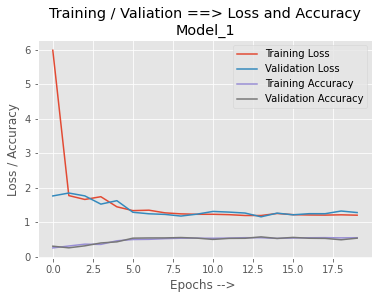

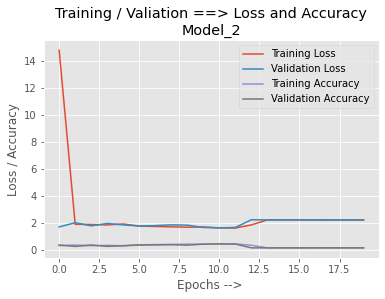

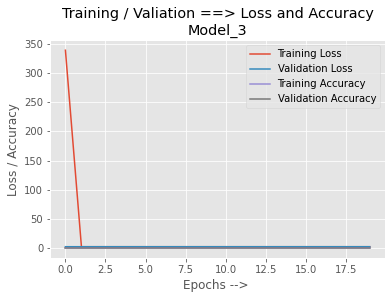

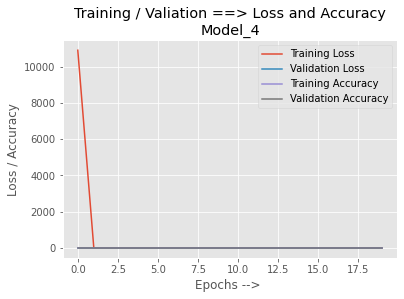

In [ ]:
# learner 1
creaing_base_learners(1, class_labels, shape, epochs, "Model_1")

# learner 2
creaing_base_learners(2, class_labels, shape, epochs, "Model_2")

# learner 3
creaing_base_learners(3, class_labels, shape, epochs, "Model_3")

# learner 4
creaing_base_learners(4, class_labels, shape, epochs, "Model_4")

# average predictions
ensemble_prediction(list_models)


Variability_in_the_train_Data

Creating 9 same base learners which are trained over a random subset with their average output probabiliteis

In [ ]:
from numpy.core.fromnumeric import shape
# from scipy.sparse.construct import random
import random

models = []
scores = []
learners = 10

for i in range(10):
  random_set = random.sample(range(training_images), int(training_images*0.5))
  newTrainingX, newTrainingY = trainX[random_set], trainX[random_set]

  m = base_learner_model_1(class_labels, shape)
  models.append(m)

  model_weights = compilation_model(models[i], "Model_1_ensemble"+str(i), epochs = epochs, trainX = newTrainingX, trainY= newTrainingY)

  models[i].load_weights(model_weights)
  result = evaluation_model(models[i])
  scores.append(result)
    
score_ensemble = ensemble_prediction(models)


TypeError: ignored

In [ ]:
'''
Due to time constraint in submission date I was not able to complete last part of evaluation where model 1 will be implemented for random selection of images
'''

'\nDue to time constraint in submission date I was not able to complete last part of evaluation where model 1 will be implemented for random selection of images\n'

In [ ]:
# ******************************************************** END *********************************************************